In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
TIME_LEN = 100
CHAR_LEN = 10

In [0]:
# 文字種類数x時間ステップ数の確率行列
prob_mat = np.random.rand(CHAR_LEN, TIME_LEN)
prob_mat /= prob_mat.sum(axis=0, keepdims=True)

In [4]:
prob_mat.sum(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

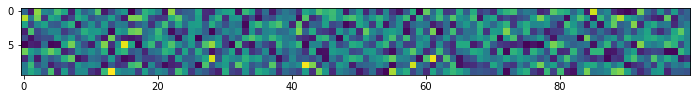

In [5]:
plt.figure(figsize=(12, 8))
plt.imshow(prob_mat)

In [0]:
B = 4

In [0]:
def beam_serach(prob_mat, B):

    init_states = np.argsort(-prob_mat[:, 0])[:B]

    state_sequences = np.matrix(init_states).T

    CHAR_LEN = prob_mat.shape[0]
    TIME_LEN = prob_mat.shape[1]

    for t in range(TIME_LEN-1):
        cur_state = state_sequences[:, -1]
        prob_combination_mat = np.matrix(prob_mat[cur_state, t]) @ np.matrix(prob_mat[:, t+1])
        ranks = np.dstack(
            np.unravel_index(
                np.argsort(-prob_combination_mat.ravel()),
                (prob_combination_mat.shape[0], prob_combination_mat.shape[1])
            )
        )[0][:B]
        new_state_sequences = state_sequences[ranks[:, 0], :]
        new_state_sequences = np.hstack([new_state_sequences, ranks[:, 1, None]])
        state_sequences = new_state_sequences

    return state_sequences

In [0]:
paths = beam_serach(prob_mat, B)

In [0]:
def to_onehot(val, max_val=CHAR_LEN):
    return np.eye(CHAR_LEN)[val]

Path : 0
[[6 3 1 6 6 0 7 5 1 3 4 0 5 9 6 5 1 3 0 5 3 2 0 1 6 4 6 5 7 1 9 0 8 0 4 2
  9 8 2 8 5 3 8 8 9 4 0 8 1 1 7 3 6 1 5 9 9 4 8 1 0 7 1 7 1 0 5 1 2 5 4 6
  3 4 6 3 6 1 9 5 5 7 6 1 9 0 1 5 9 1 4 2 5 4 7 8 1 5 3 6]]


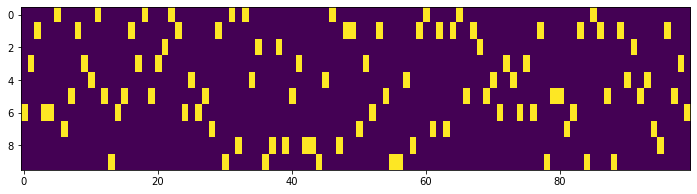

Path : 1
[[1 3 0 6 6 0 7 5 1 3 4 0 5 9 6 5 1 3 0 5 3 2 0 1 6 4 6 5 7 1 9 0 8 0 4 2
  9 8 2 8 5 3 8 8 9 4 0 8 1 1 7 3 6 1 5 9 9 4 8 1 0 7 1 7 1 0 5 1 2 5 4 6
  3 4 6 3 6 1 9 5 5 7 6 1 9 0 1 5 9 1 4 2 5 4 7 8 1 5 3 6]]


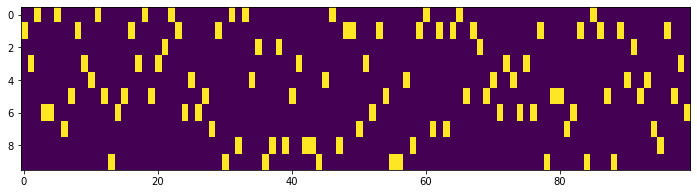

Path : 2
[[1 3 1 6 6 0 7 5 1 3 4 0 5 9 6 5 1 3 0 5 3 2 0 1 6 4 6 5 7 1 9 0 8 0 4 2
  9 8 2 8 5 3 8 8 9 4 0 8 1 1 7 3 6 1 5 9 9 4 8 1 0 7 1 7 1 0 5 1 2 5 4 6
  3 4 6 3 6 1 9 5 5 7 6 1 9 0 1 5 9 1 4 2 5 4 7 8 1 5 3 6]]


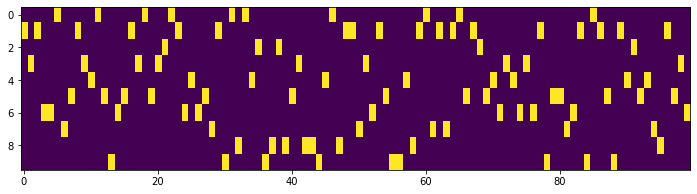

Path : 3
[[6 3 0 6 6 0 7 5 1 3 4 0 5 9 6 5 1 3 0 5 3 2 0 1 6 4 6 5 7 1 9 0 8 0 4 2
  9 8 2 8 5 3 8 8 9 4 0 8 1 1 7 3 6 1 5 9 9 4 8 1 0 7 1 7 1 0 5 1 2 5 4 6
  3 4 6 3 6 1 9 5 5 7 6 1 9 0 1 5 9 1 4 2 5 4 7 8 1 5 3 6]]


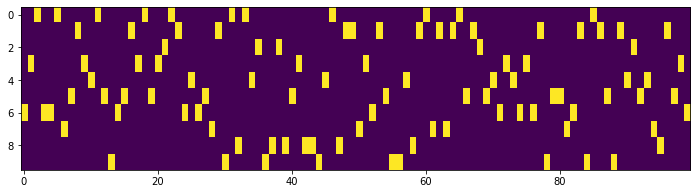

In [10]:
for i in range(paths.shape[0]):
    print(f'Path : {i}')
    print(paths[i, :])
    plt.figure(figsize=(12, 3))
    plt.imshow(np.array([to_onehot(paths[i, :][0, j]) for j in range(paths[i, :].shape[1])]).T, aspect='auto')
    plt.show()
    print('='*100)